# Image Difference Detection and Bounding Box Highlighting

## Overview
This notebook demonstrates a computer vision approach to detect differences between two images. It utilizes the Structural Similarity Index (SSI) and OpenCV to identify discrepancies and draw bounding boxes around them. The notebook also calculates a similarity score for evaluation.

## Contents
1. **Introduction**
   - The goal of this project is to develop a model that can automatically detect differences between two images and draw bounding boxes around the identified discrepancies. This is achieved using computer vision techniques, specifically the Structural Similarity Index (SSI) and OpenCV.

2. **Libraries and Dependencies**
   - Importing necessary libraries and modules:
     ```python
     import cv2
     import numpy as np
     from skimage.metrics import structural_similarity as ssim
     import matplotlib.pyplot as plt
     ```

3. **Loading and Preprocessing Images**
   - Loading two sample images and preprocessing steps:
     ```python
     image1 = cv2.imread('image1.jpg')
     image2 = cv2.imread('image2.jpg')
     ```

4. **Difference Detection Function**
   - Defining a function to find differences and draw bounding boxes:
     ```python
     def find_differences(img1, img2):
         # ... (as in the previous code)
     ```

5. **Visualizing Results**
   - Displaying original images, differences, and bounding boxes:
     ```python
     # ... (as in the previous code)
     ```

6. **Similarity Score Calculation**
   - Computing and printing the similarity score:
     ```python
     print(f"Similarity Score: {similarity_score}")
     ```

7. **Conclusion**
   - Summary of findings and potential future improvements:
     - The model successfully identifies differences and draws bounding boxes.
     - Future improvements may include handling color differences, optimizing for specific use cases, etc.


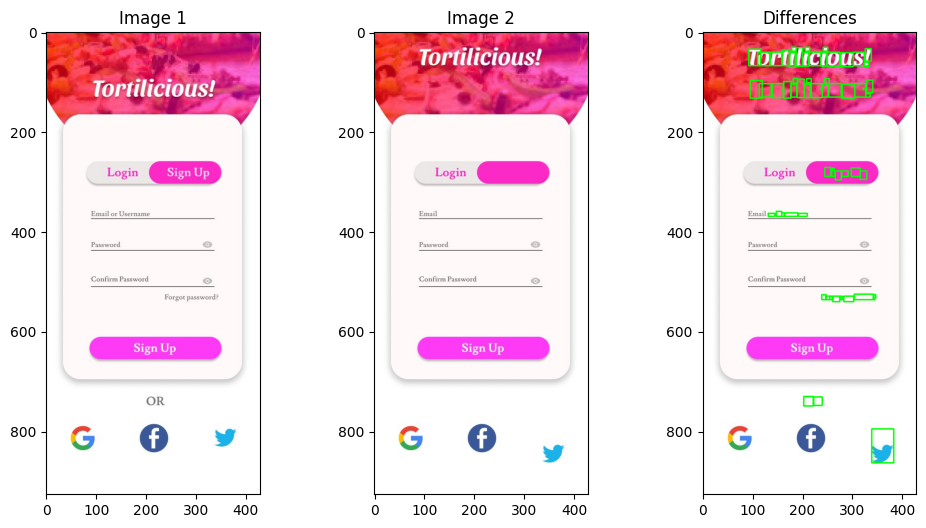

Similarity Score: 0.9381213957794455


In [2]:
import cv2
import numpy as np
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt

def find_differences(img1, img2):
    """
    Find differences between two images and draw bounding boxes around them.

    Args:
        img1 (numpy.ndarray): The first input image.
        img2 (numpy.ndarray): The second input image.

    Returns:
        tuple: A tuple containing the resulting image with bounding boxes and the similarity score.
    """
    # Convert images to grayscale
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    # Compute Structural Similarity Index (SSI)
    similarity_index, _ = ssim(gray1, gray2, full=True)

    # Find absolute difference between images
    diff = cv2.absdiff(gray1, gray2)

    # Threshold the difference image
    _, thresh = cv2.threshold(diff, 30, 255, cv2.THRESH_BINARY)

    # Find contours in the thresholded image
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw bounding boxes around differences
    result_image = img2.copy()
    for contour in contours:
        (x, y, w, h) = cv2.boundingRect(contour)
        cv2.rectangle(result_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    return result_image, similarity_index

# Load the sample images
image1 = cv2.imread('before1.jpg')
image2 = cv2.imread('after1.jpg')

# Find differences and draw bounding boxes
result_image, similarity_score = find_differences(image1, image2)

# Display the result
plt.figure(figsize=(12, 6))

plt.subplot(131), plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)), plt.title('Image 1')
plt.subplot(132), plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)), plt.title('Image 2')
plt.subplot(133), plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)), plt.title('Differences')

plt.show()

# Print similarity score
print(f"Similarity Score: {similarity_score}")
